In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
def roseplot(angles,gtype,color):

    #n_numbers = 100
    bins_number = 50  # the [0, 360) interval will be subdivided into this
    # number of equal bins
    bins = np.linspace(0.0,360 , bins_number + 1) #2 * np.pi
    #angles = 2 * np.pi * np.random.rand(n_numbers)
    n, _, _ = plt.hist(angles, bins)
    print(len(n))
    print(n)
    print(bins)
    plt.clf()
    width = 2 * np.pi / bins_number
    #width =np.deg2rad(bins_number)
    print(width)
    ax = plt.subplot(1, 1, 1, projection='polar')
    #fig,ax = plt.figure(projection = 'polar')
    bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0, label = gtype)#[:bins_number]
    #bars = plt.bar(bins[:bins_number], n, width=width, bottom=0.0, label = gtype)
    for bar in bars:
        bar.set_alpha(0.2)
    plt.show()

In [3]:
df = pd.read_csv('../data/PRFDR_angles.csv',index_col = 0)
df.head()

time  iter  cell_id type      angle
0     0     0        0   ER  72.502036
1     1     0        0   ER  35.695517
2     2     0        0   ER  51.084667
3     3     0        0   ER  26.941395
4     4     0        0   ER  16.739110

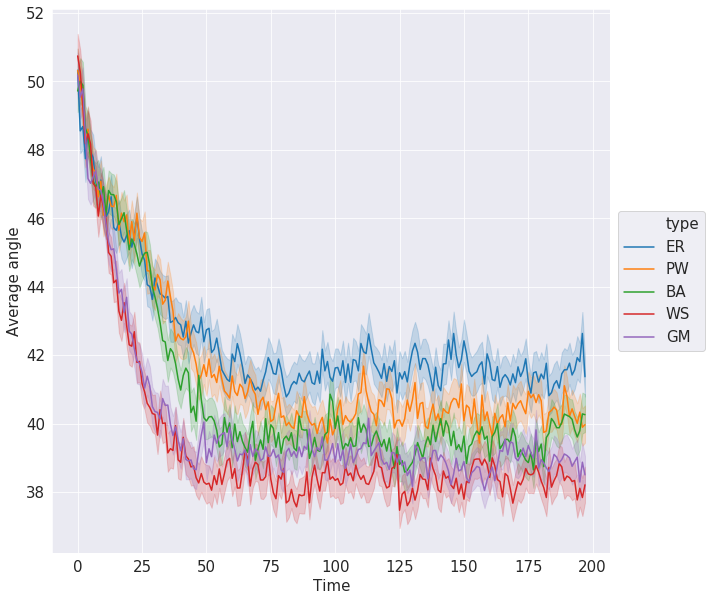

In [4]:
### average turning angle over time per graph type : 
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'angle',data = df,hue = 'type')#units = 'iter'
plt.ylabel('Average angle',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

In [5]:
### standard deviation in turning angle over time per graph type : 
# new df
graph_types = df.type.unique()
std_rows = []
for t in range(197):
    df_at_t = df[df.time == t]
    for gt in graph_types:
        angles = df_at_t[df_at_t.type == gt].angle
        std_rows.append([t,gt,np.std(angles)])


[27.86981566 27.82016905 27.65864737 28.24947078 27.95931696 27.21657
 27.19583309 27.81559432 27.52530508 27.14926522 26.95041414 27.41811445
 28.06945476 27.48012279 27.82731673 26.88181968 27.0362315  27.22076082
 27.09916512 26.94457154 27.20980094 27.27470562 26.96847381 27.10113602
 26.50006052 26.80175376 26.72571152 27.0806745  27.60667632 26.36025605
 27.35398963 26.33146594 26.63387802 26.68392458 26.50735167 26.85064246
 26.54475457 26.67899327 26.41259997 26.90338224 26.60947893 26.1377777
 26.40178054 26.30466263 26.73734169 27.23190543 26.2637959  26.5378422
 26.77461025 26.67582033 26.30240884 26.25099524 26.08455484 26.70654364
 26.29059428 26.40294132 26.43459443 26.13244215 26.24979862 26.07194892
 25.96000826 26.2560734  26.28711571 25.37692165 25.63180846 26.35961779
 26.48768624 26.52885929 25.67795531 25.93959313 26.02129077 26.31649792
 26.43770417 25.01075424 25.78806945 26.16844489 26.59870954 26.21540761
 25.30551191 25.35489926 26.31847129 26.14186123 26.2393

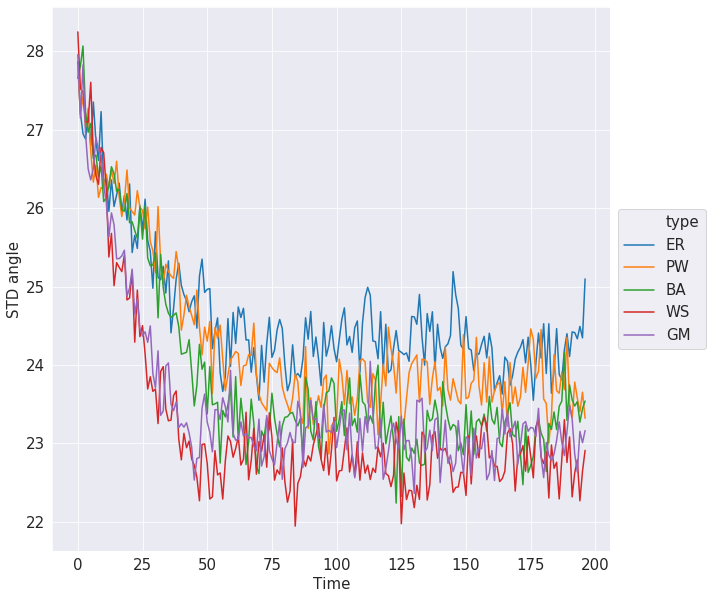

In [6]:
std_df = pd.DataFrame(data = std_rows,columns = ['time','type','std'])
print(std_df['std'].unique())
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'std',data = std_df,hue = 'type')
plt.ylabel('STD angle',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

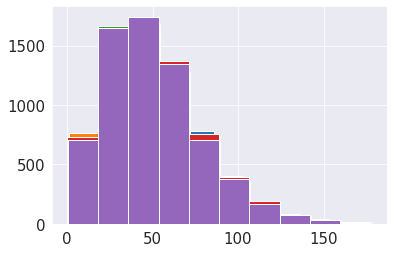

In [7]:
# plt.figure(figsize = (10,10))

df_at_zero = df[df.time == 0]
graph_types = df.type.unique()
colors = current_palette = sns.color_palette()[:5]
for i,gt in enumerate(graph_types):
    angles = df_at_zero[df_at_zero.type == gt].angle
    plt.hist(angles)
    #roseplot(angles,gt,colors[i]) 
    
# plt.legend()
# plt.show()

In [8]:
def roseplot(angles,gtype,color):
    #degrees = np.random.randint(0, 360, size=200)
    radians = np.deg2rad(angles)

    bin_size = 10
    a , b=np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

    #fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111, projection='polar')
    bar = ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, edgecolor='k',alpha = .1,label = gtype)
#     ax.set_theta_zero_location("N")
#     ax.set_theta_direction(-1)
    return ax

0


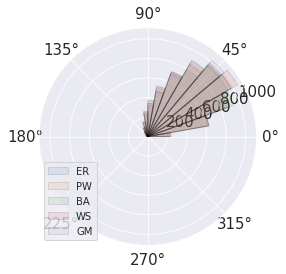

1


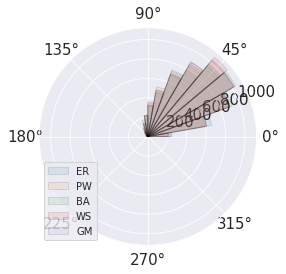

2


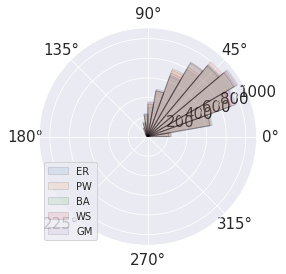

3


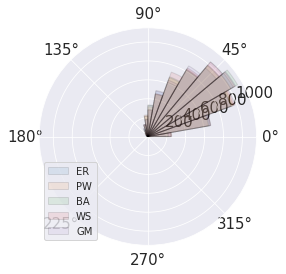

4


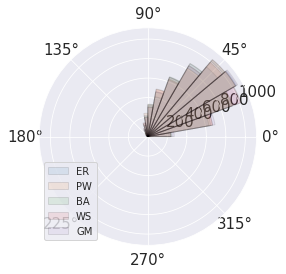

5


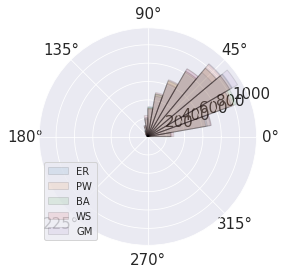

6


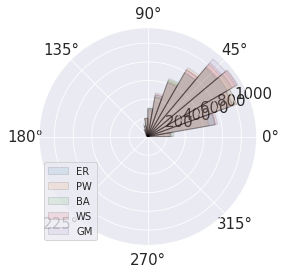

7


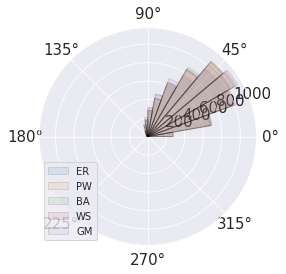

8


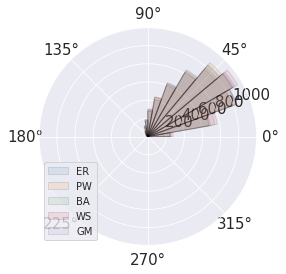

9


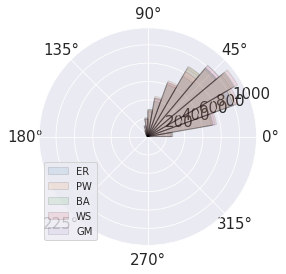

10


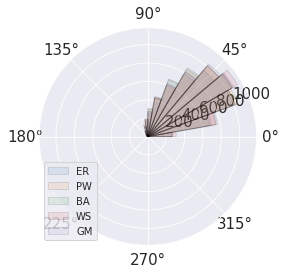

11


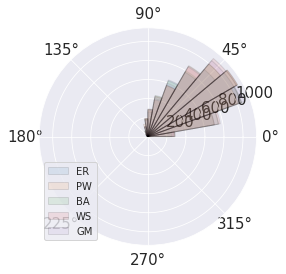

12


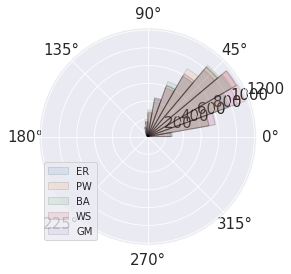

13


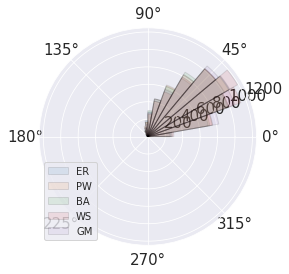

14


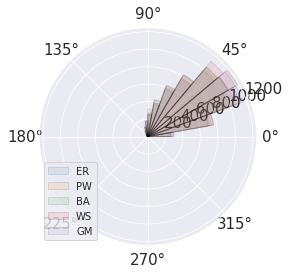

15


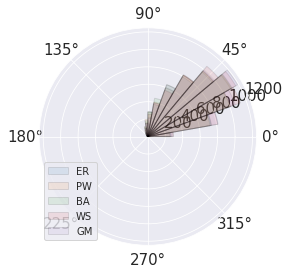

16


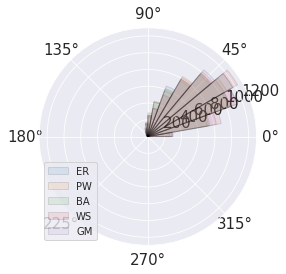

17


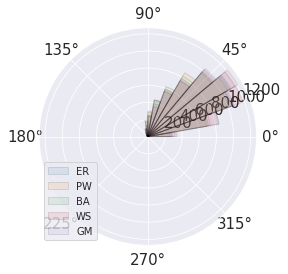

18


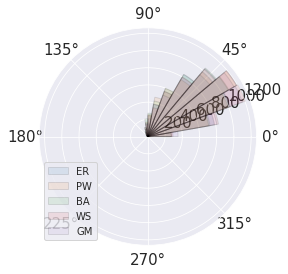

19


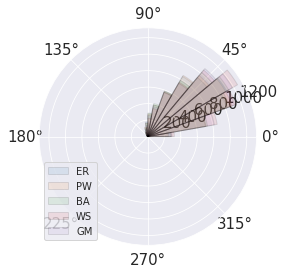

20


KeyboardInterrupt: 

In [9]:
tims = [0,50,100,150]    
for t in df.time.unique():
    print(t)
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    for i,gt in enumerate(graph_types):
        angles = df_at_zero[df_at_zero.type == gt].angle
        #plt.hist(angles)
        roseplot(angles,gt,colors[i])

    plt.legend(loc = 3)
    plt.show()

0
12
24
48


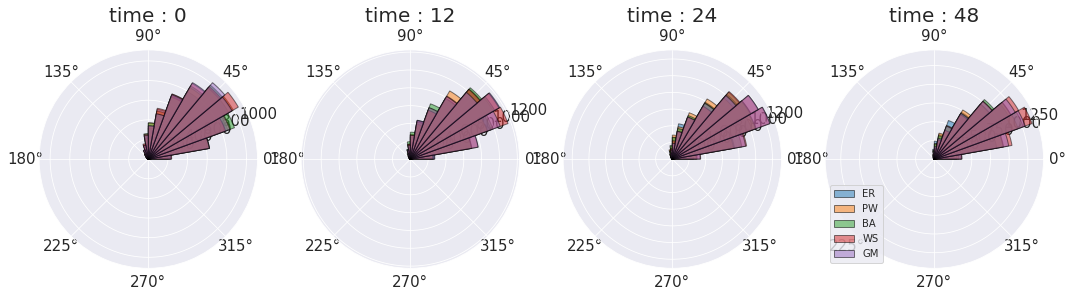

In [10]:

def roseplot(angles,gtype,color,fig,j):
    #degrees = np.random.randint(0, 360, size=200)
    tims = [0,12,24,48]
    radians = np.deg2rad(angles)

    bin_size = 10
    a , b=np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

    #fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,4,j + 1, projection='polar')
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, edgecolor='k',alpha = .5,label = gtype)
    ax.set_title('time : ' + str(tims[j]), size=20,y=1.1)


fig = plt.figure(figsize = (18,6))
tims = [0,12,24,48]    
for j,t in enumerate(tims):
    print(t)
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    for i,gt in enumerate(graph_types):
        angles = df_at_zero[df_at_zero.type == gt].angle
        #plt.hist(angles)
        roseplot(angles,gt,colors[i],fig,j)

plt.legend(loc = 3)
plt.show()


0
12
24
48


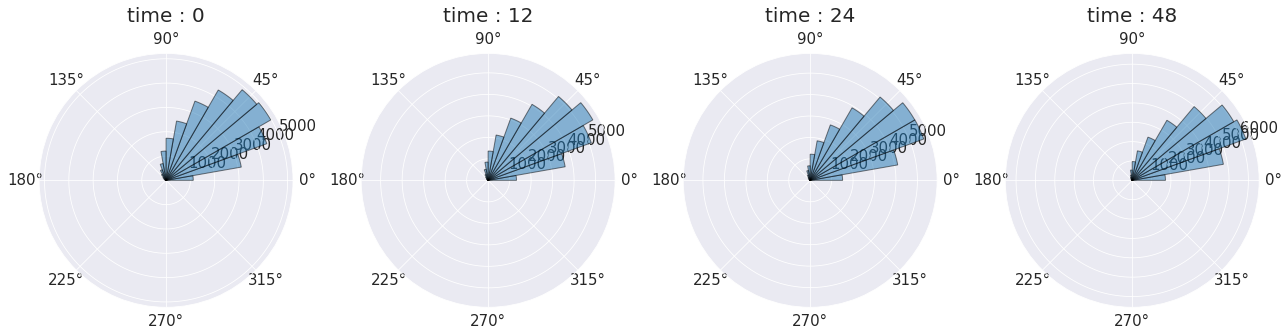

In [11]:


fig = plt.figure(figsize = (18,6))
tims = [0,12,24,48]    
for j,t in enumerate(tims):
    print(t)
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    angles = df_at_zero.angle
        #plt.hist(angles)
    roseplot(angles,gt,colors[0],fig,j)
plt.tight_layout()
plt.show()


In [12]:
df = pd.read_csv('../data/PRFDR_relangles.csv',index_col = 0)
df.head()
print(max(df.time))

197


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


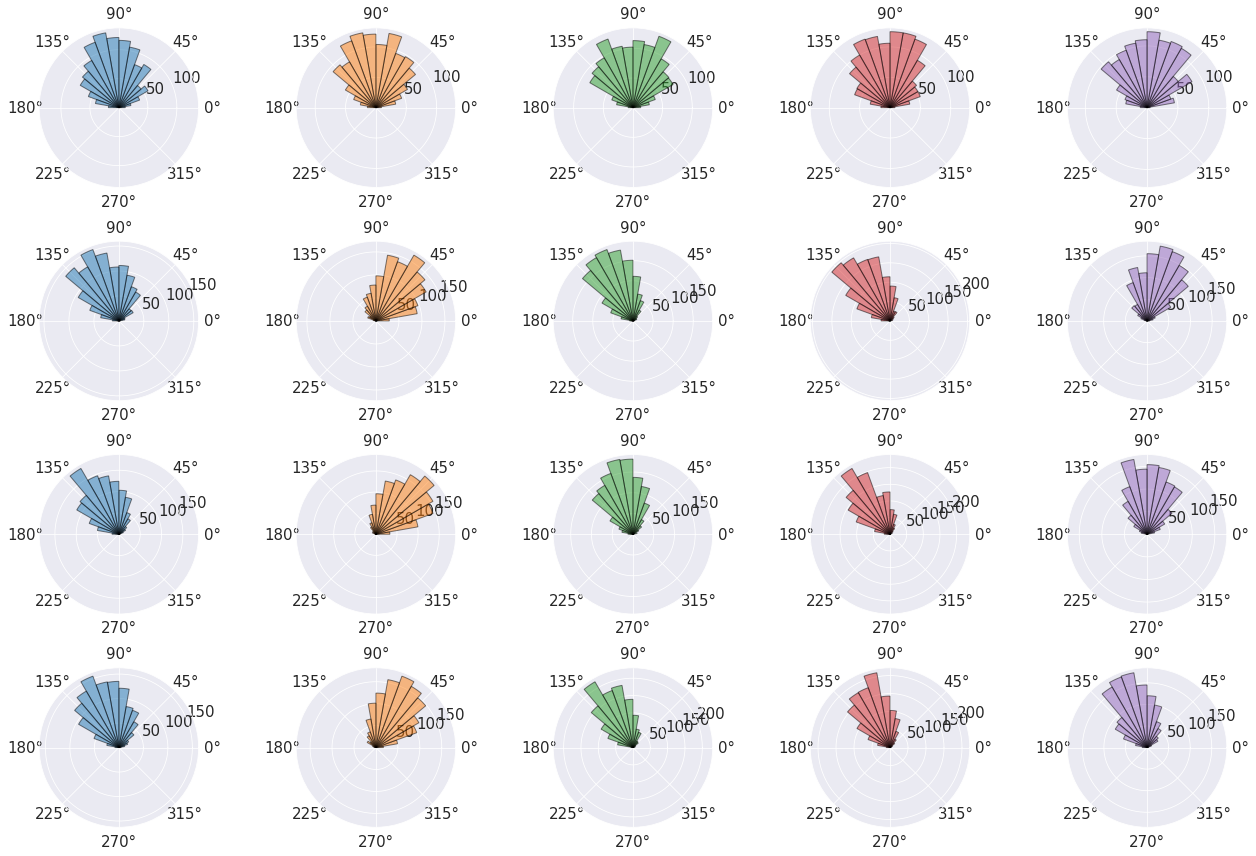

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


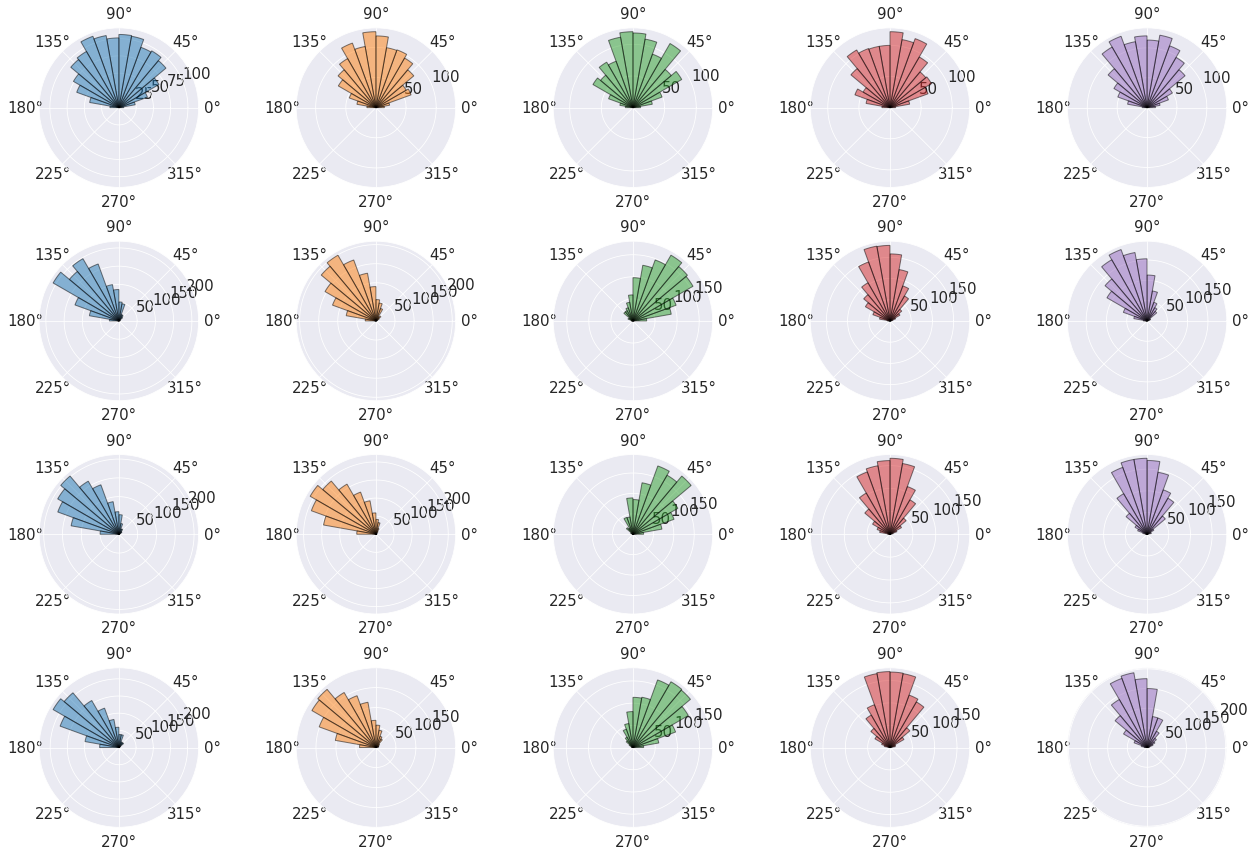

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


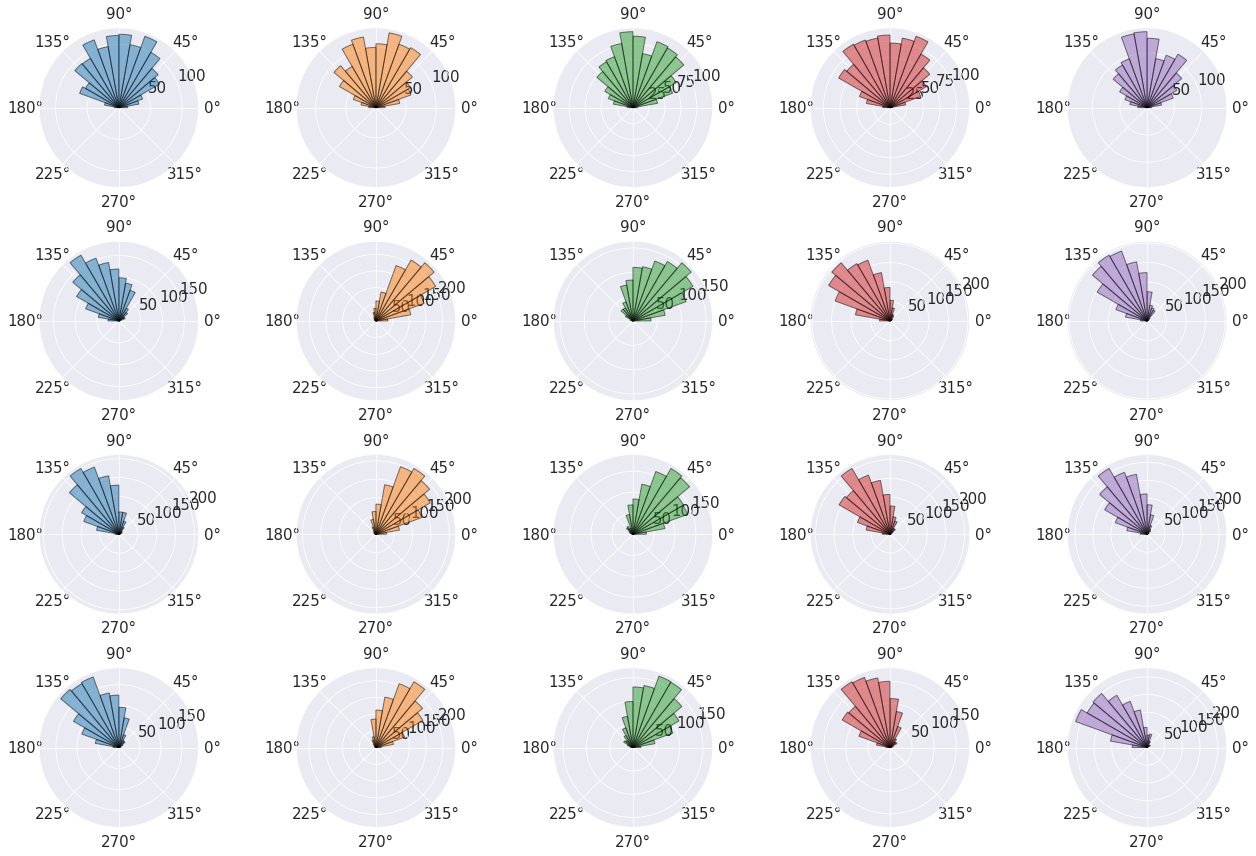

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


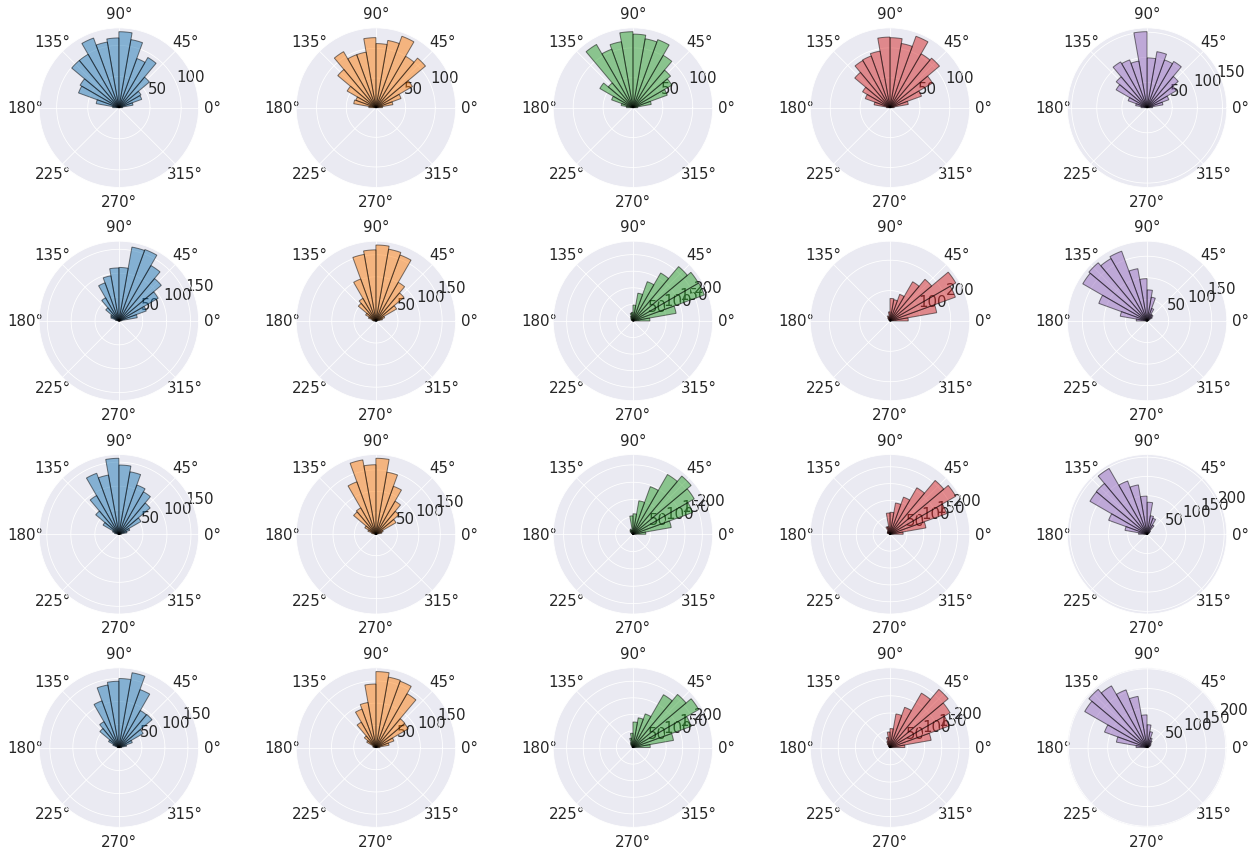

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


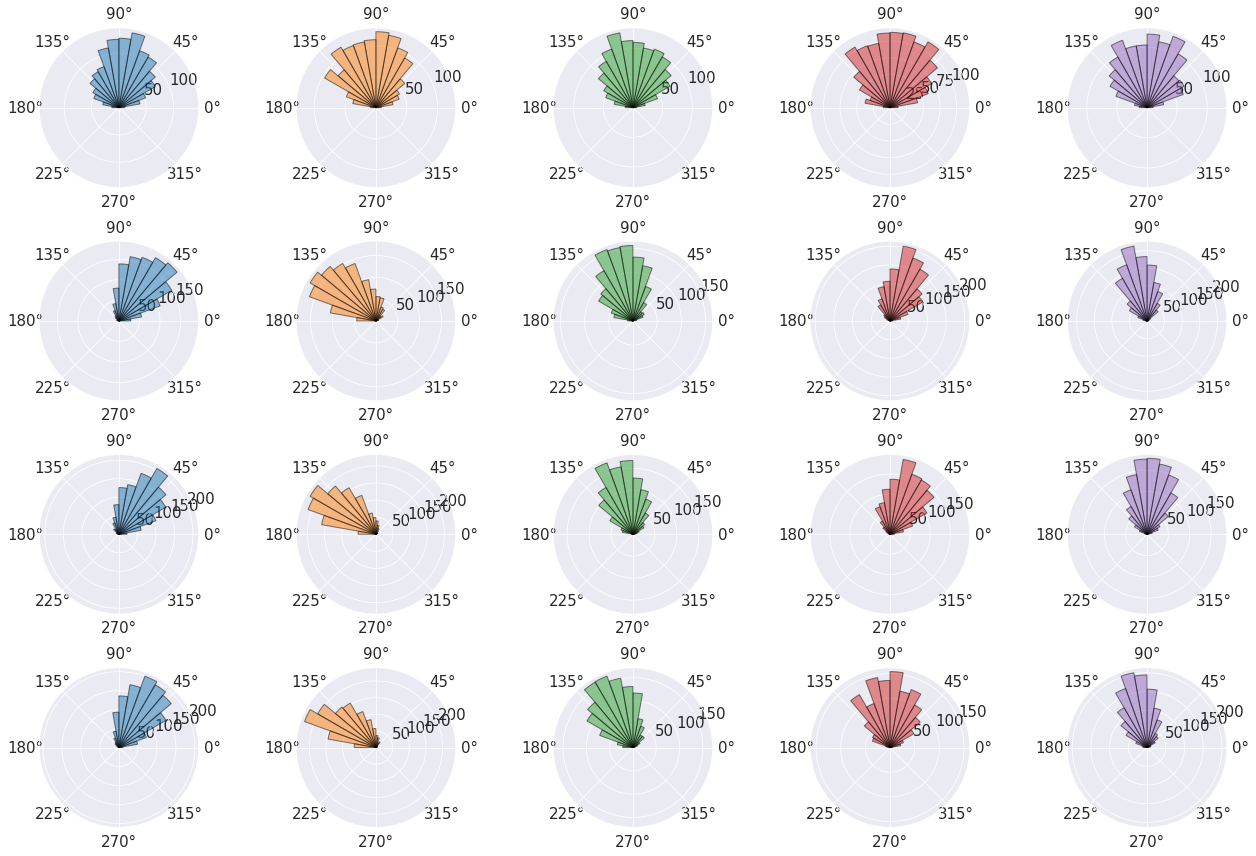

In [13]:

def roseplot(angles,gtype,color,fig,count):
    #degrees = np.random.randint(0, 360, size=200)
    radians = np.deg2rad(angles)

    bin_size = 10
    a , b=np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

    #fig = plt.figure(figsize=(10,8))
    print(count)
    ax = fig.add_subplot(4,5,count, projection='polar')
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, edgecolor='k',alpha = .5,label = gtype)

for itr in df.iter.unique():
    dfx = df[df.iter == itr]
    fig = plt.figure(figsize = (18,12))
    tims = [0,50,100,197]    
    count = 1
    for j,t in enumerate(tims):
        df_at_zero = dfx[dfx.time == t]
        graph_types = dfx.type.unique()
        colors = current_palette = sns.color_palette()[:5]
        for i,gt in enumerate(graph_types):
            angles = df_at_zero[df_at_zero.type == gt].angle
            #plt.hist(angles)
            roseplot(angles,gt,colors[i],fig,count)
            count += 1

    plt.tight_layout()
    plt.show()


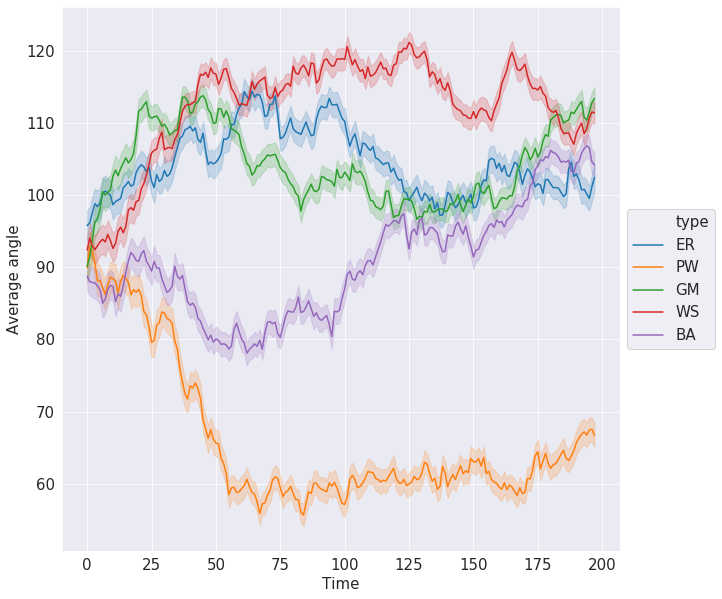

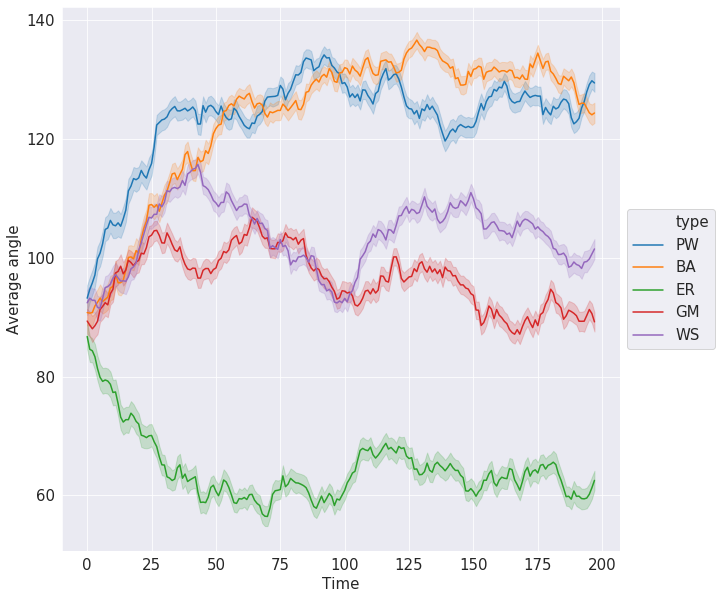

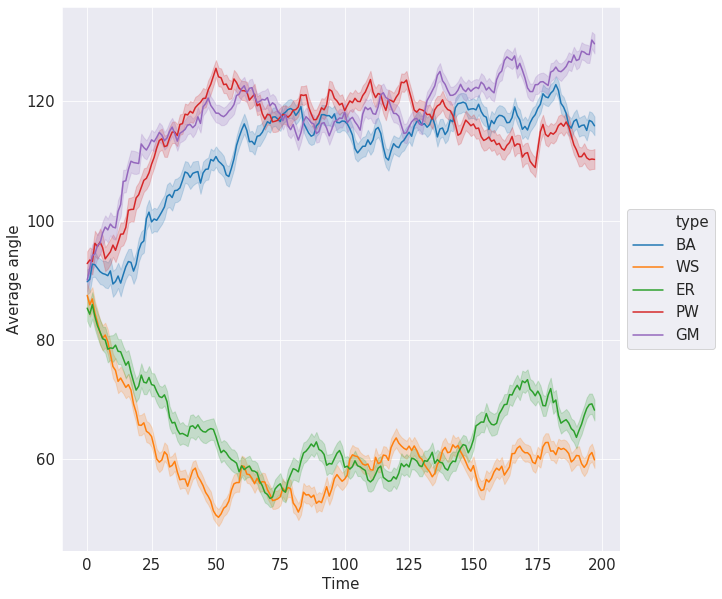

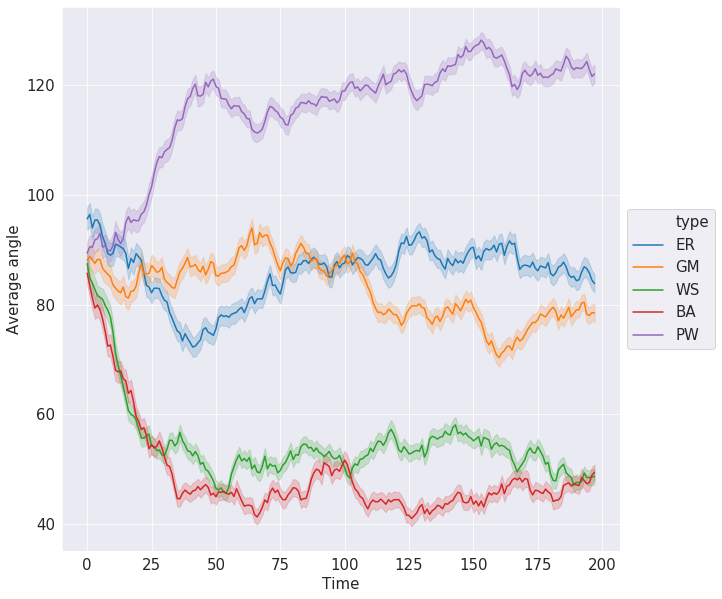

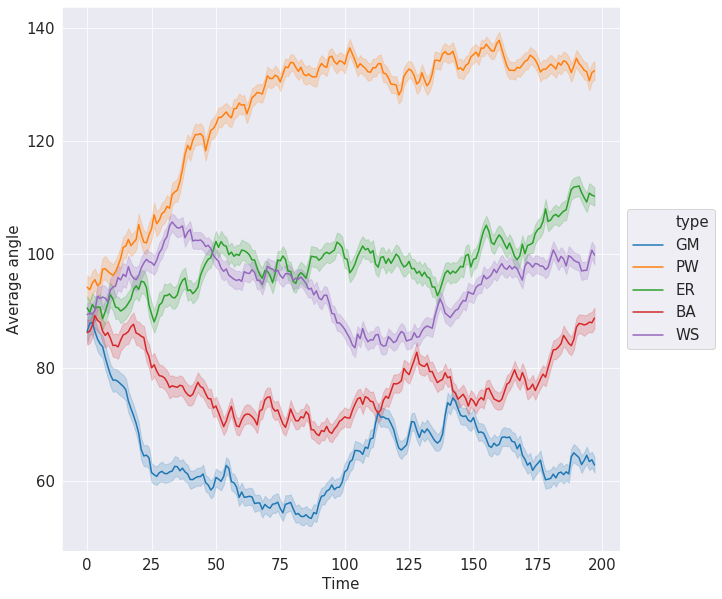

In [14]:
### average turning angle over time per graph type per iteration: 
import matplotlib
for itr in df.iter.unique(): 
    df_itr = df[df.iter == itr]
    plt.figure(figsize = (10,10))
    sns.lineplot(x = 'time',y = 'angle',data = df_itr,hue = 'type')#units = 'iter'
    plt.ylabel('Average angle',fontsize = 15)
    plt.xlabel('Time',fontsize = 15)
    plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()